# Clientes Fitness

## Resumen 
Entrene el modelo predictivo certero que ayudo a determinar cuales son los clientes mas redituable para los gimnasios, con una precision de 92 puntos, utilizando pandas, seaborn, matplot.lib,  sklearn.preprocessing, sklearn.ensemble, sklearn.metrics  y scipy.cluster.hierarchy.

## Objetivo de Estudio 

Uno de los problemas más comunes que enfrentan los gimnasios y otros servicios es la pérdida de clientes. ¿Cómo descubres si un/a cliente ya no está contigo? Puedes calcular la pérdida en función de las personas que se deshacen de sus cuentas o no renuevan sus contratos. Sin embargo, a veces no es obvio que un/a cliente se haya ido, por lo que se busca detectar a los clientes que se proximos en retirarse y los clientes que tienden a permanecer.

## Metodologia 
1. Importamos datos
2. Limpieza de datos 
    - Imprimimos una porcion de los datos y su informacion 
    - Analisamos los errores de formato y datos faltantes
    - Limpiamos, borramos y llenamos los datos 
3. Analisis de datos
    - Dividimos los datos en los clientes que se fueron y permanecieron 
    - Comparamos 
4. Aplicamos modelos de prediccion regresión logística, bosque aleatorio.
    - Evaluamos su indicadores de eficiencia 
5. Conclusiones.     

## Importamos Librerias (Herramientas)

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  recall_score, precision_score, f1_score,accuracy_score
from scipy.cluster.hierarchy import dendrogram, linkage


## Importamos los Datos 

In [2]:
df= pd.read_csv('../data/gym_churn_us.csv', sep=',')

## EDA

In [3]:
# analizamos la estructura de los datos 
print(df.head())
print(df.info())
print(df.describe())

   gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0             1   29                     14.227470                    5.0   
1             1   31                    113.202938                   12.0   
2             0   28                    129.448479                    1.0   
3             1   33                     62.669863                   12.0   
4             0   26                    198.362265                    1.0   

   Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
0  

#### Conclucion 
No se encontraron valores ausentes 

In [4]:
# separamos por canselacion 
df_grouped= df.groupby('Churn')

In [5]:
#analizamos los valores medios 
print(df_grouped.mean())

         gender  Near_Location   Partner  Promo_friends     Phone  \
Churn                                                               
0      0.510037       0.873086  0.534195       0.353522  0.903709   
1      0.510839       0.768143  0.355325       0.183789  0.902922   

       Contract_period  Group_visits        Age  Avg_additional_charges_total  \
Churn                                                                           
0             5.747193      0.464103  29.976523                    158.445715   
1             1.728558      0.268615  26.989632                    115.082899   

       Month_to_end_contract  Lifetime  Avg_class_frequency_total  \
Churn                                                               
0                   5.283089  4.711807                   2.024876   
1                   1.662582  0.990575                   1.474995   

       Avg_class_frequency_current_month  
Churn                                     
0                               2.0

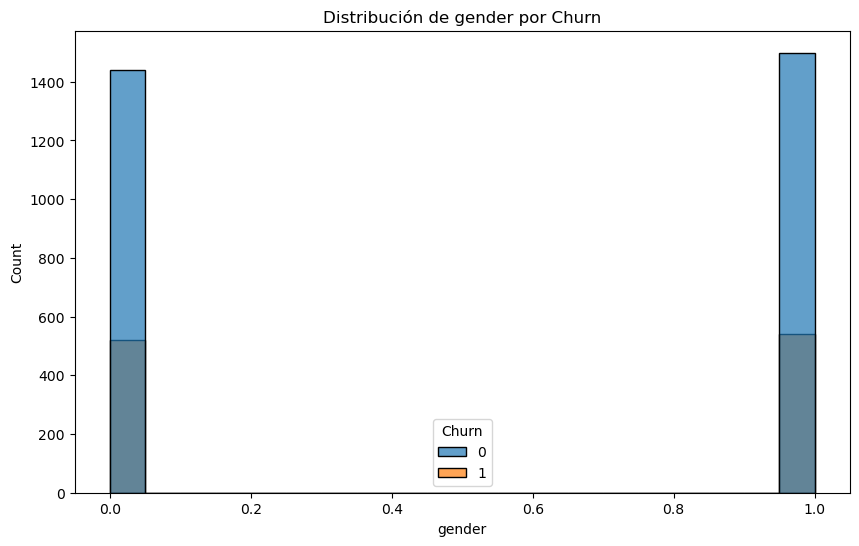

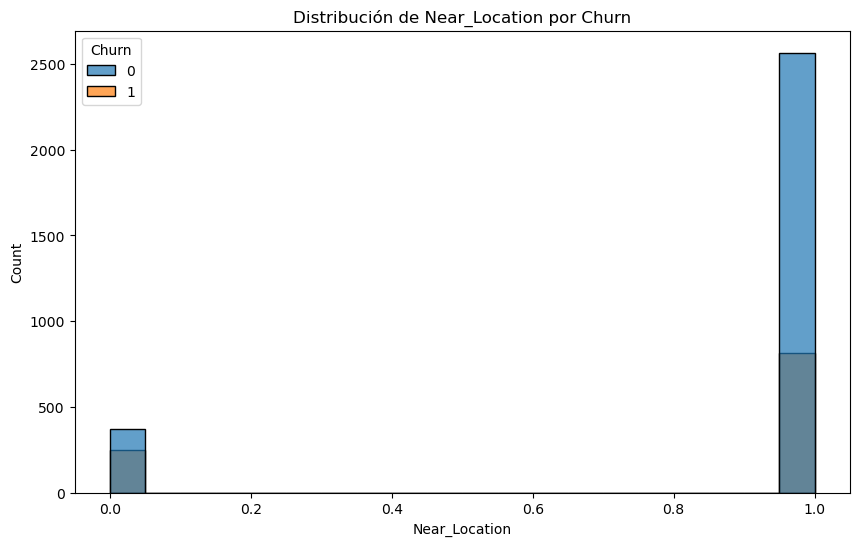

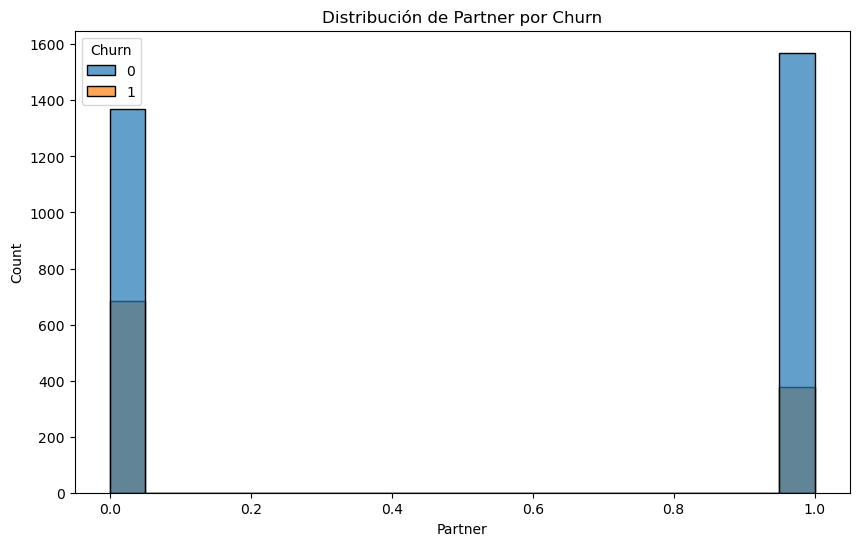

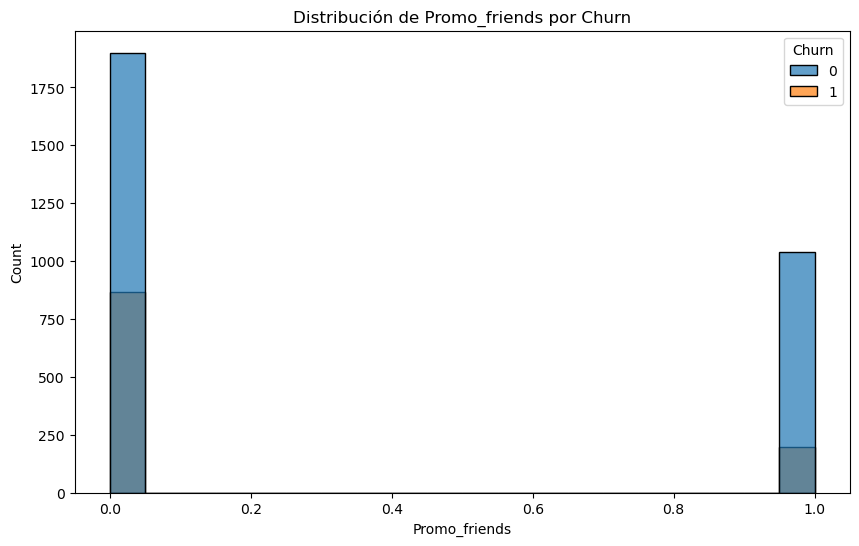

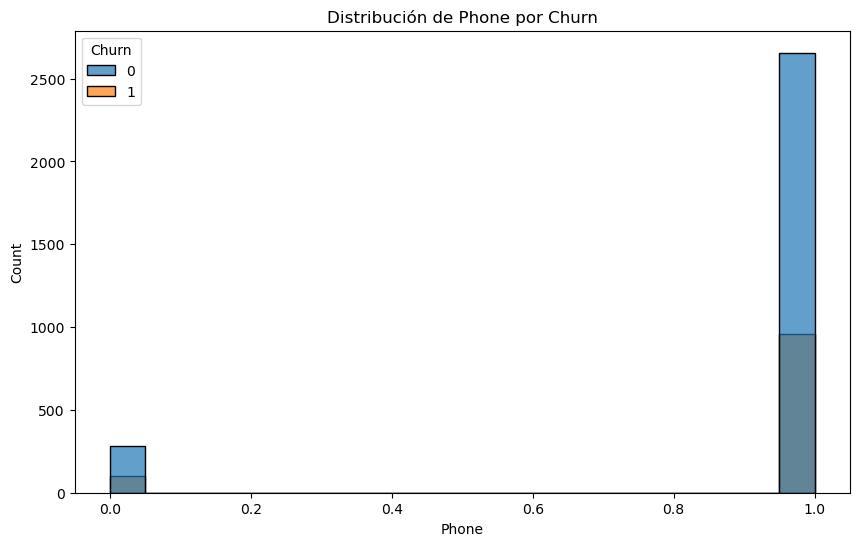

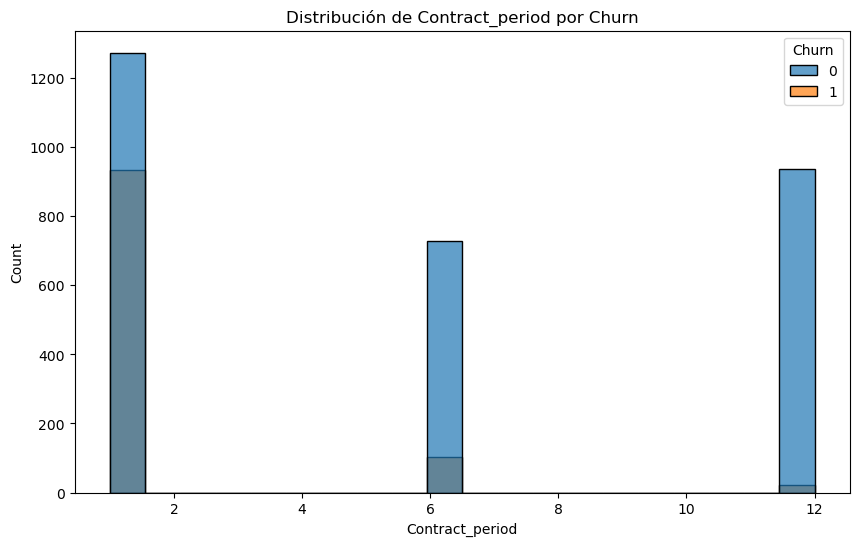

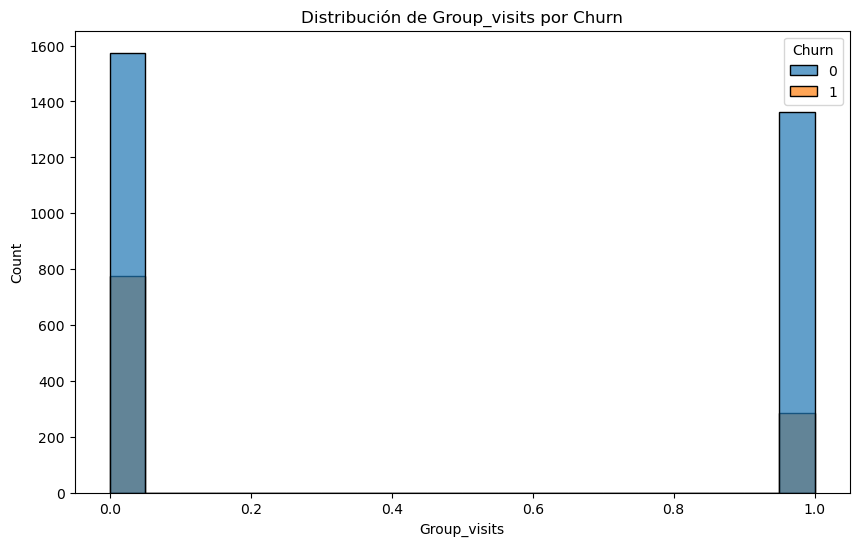

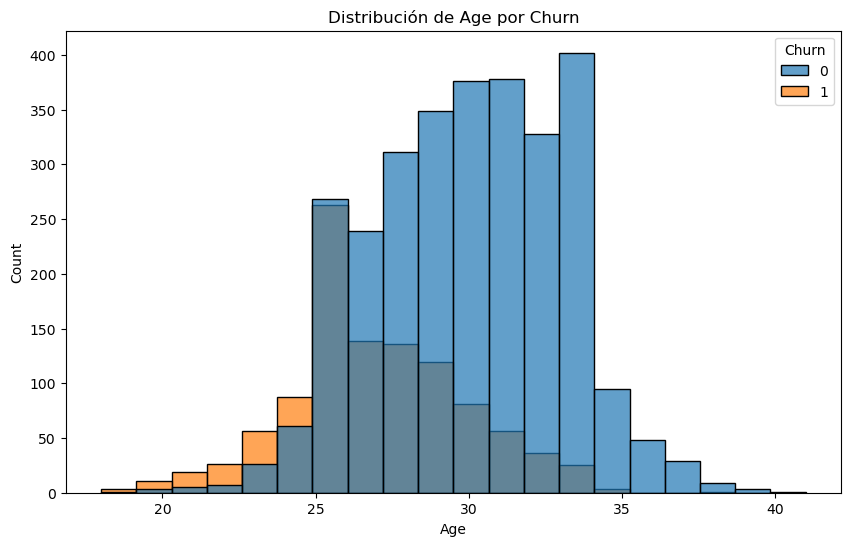

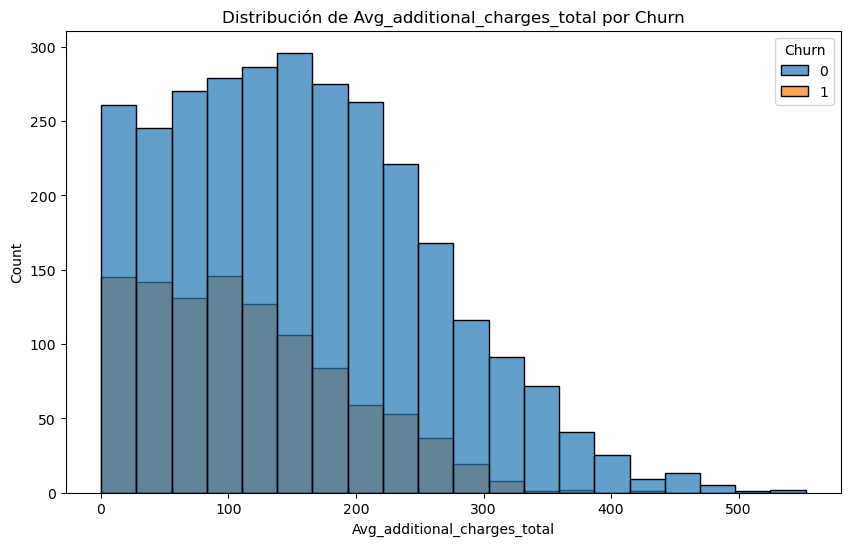

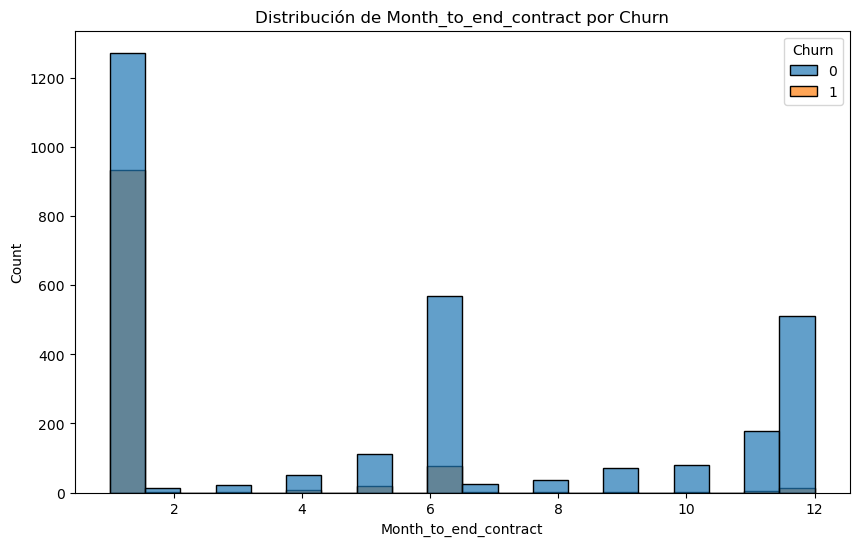

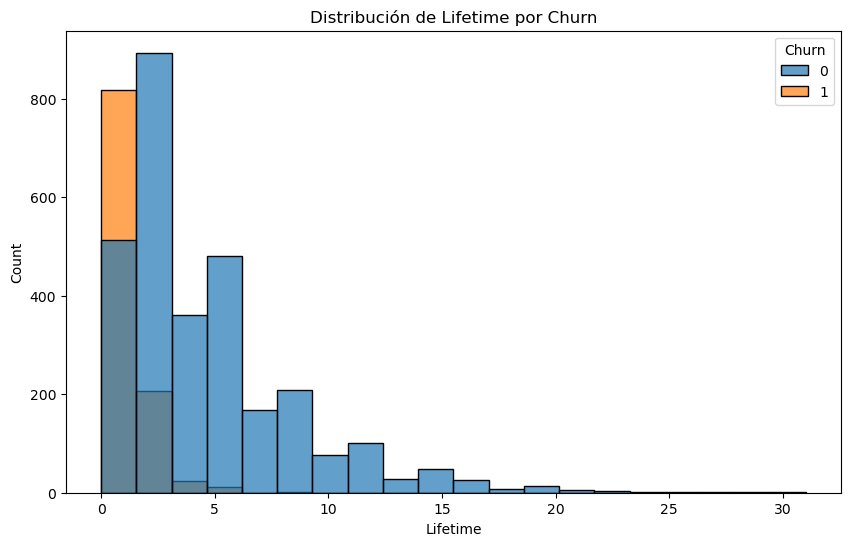

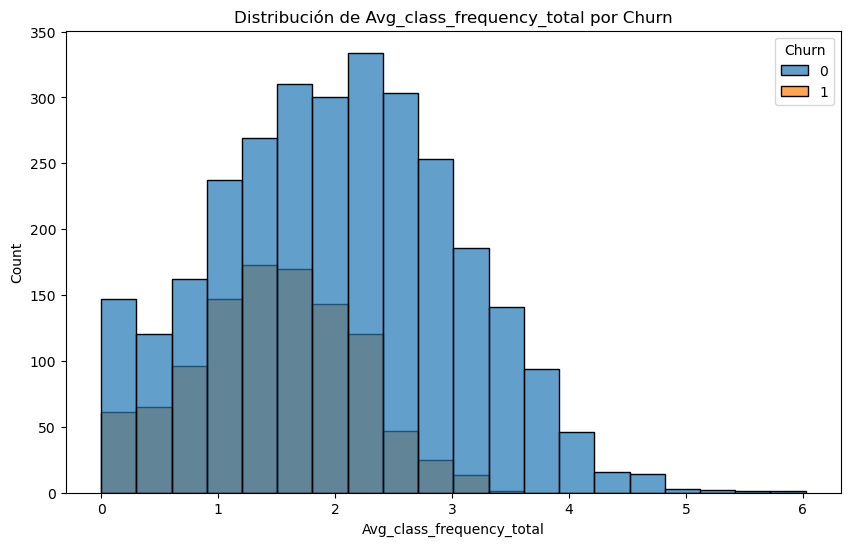

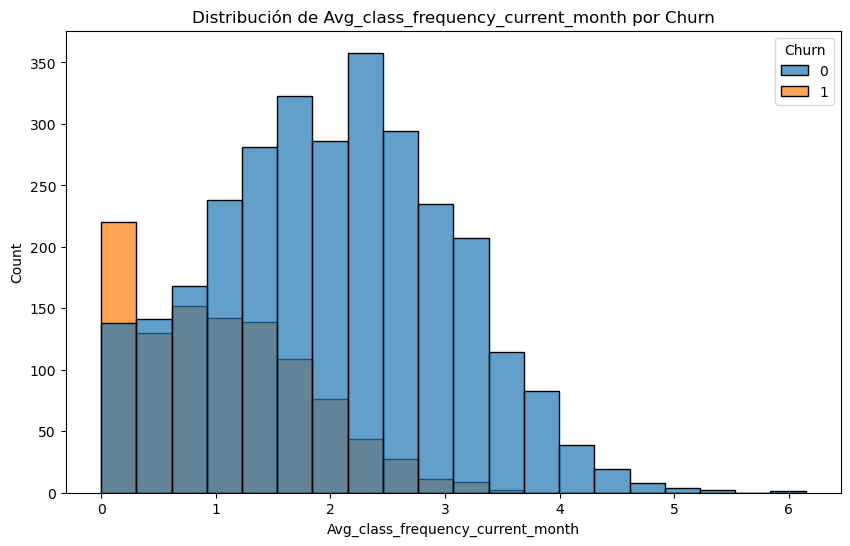

In [6]:
# Creamos una funcion para graficar histogramsa de las variables 
def histo (data,caracteristica):
    plt.figure(figsize=(10,6))
    sns.histplot(data=data,x=caracteristica,hue='Churn', bins=20, alpha=0.7)
    plt.title(f'Distribución de {caracteristica} por Churn')
    plt.show()
columnas=df.columns.drop('Churn')
# Creamos un bucle que recora toda las columnas 
for columna in columnas:
    histo(df,columna)

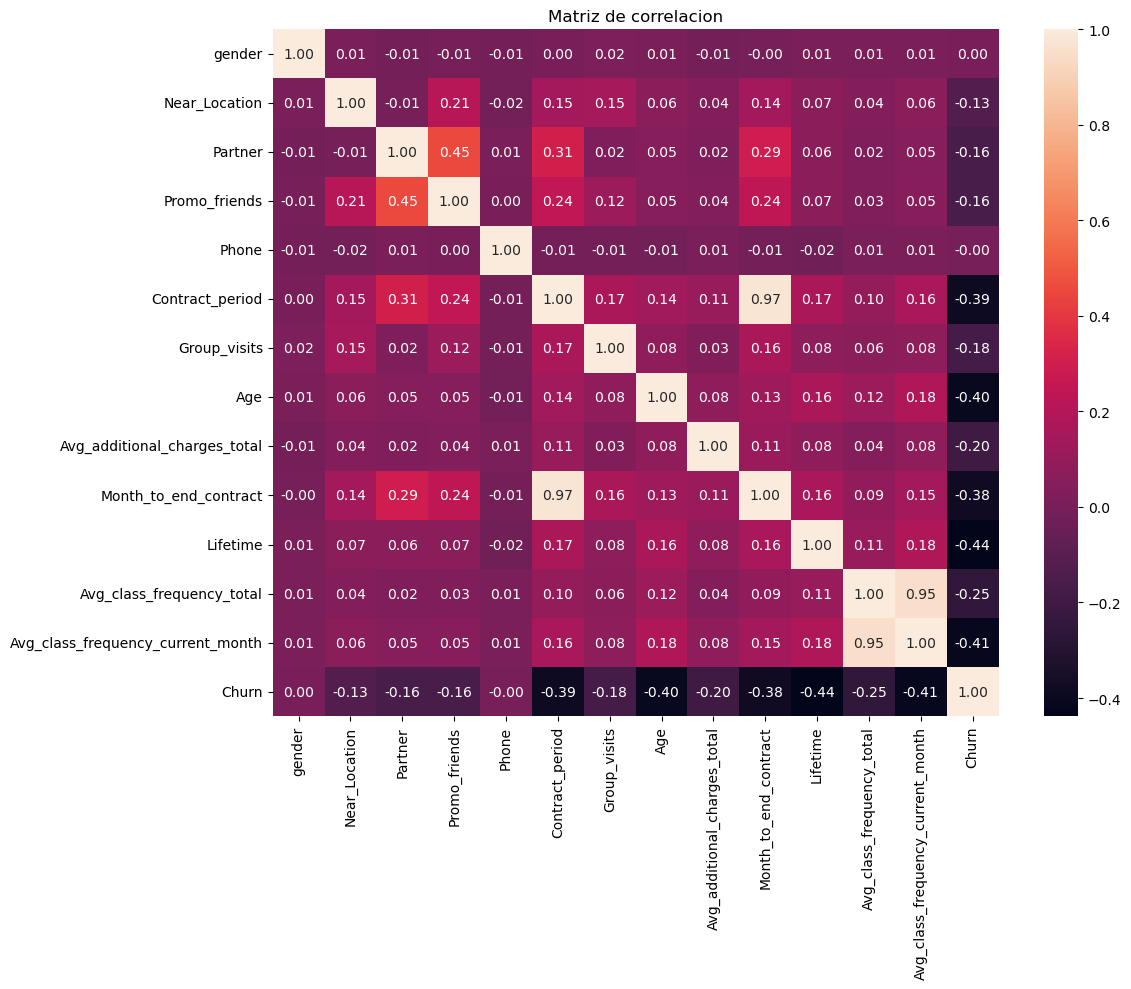

In [7]:
# creamos una matriz de correlacion 
correlacion=df.corr()
# Graficamos la correlacion 
plt.figure(figsize=(12,10))
sns.heatmap(correlacion,annot=True,fmt='.2f')
plt.title('Matriz de correlacion')
plt.tight_layout()
plt.show()

#### Conclucion 
A primera vista se puede observar que las personas que pagan su suscripción anual tienden a desertar, mientras que los que pagan mensualmente, siguen sus metas. En cuanto a la edad podemos observar que las personas menores de 25 años son más constantes,  quizás les importe más su apariencia o tengan más tiempo.
En tema de correlación las características de contrato y tiempo de expiración de contrato tienen una correlación alta por la naturaleza del concepto, así como las que miden las visitas por semana.

## Construccion del modelo 

In [8]:
# dividimos las caracteristicas en X y la variable objetivo en y
X= df.drop(columns=['Churn'])
y=df['Churn']
# dividimos el conjunto de datos
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=0)
# estandarizamos los datos
scaler= StandardScaler()
X_train_st= scaler.fit_transform(X_train)
X_test_st= scaler.transform(X_test)

In [9]:
# creamos una funcion para entrenar modelos
def prediction (m, X_train, y_train, X_test, y_test):
    model=m
    model.fit(X_train, y_train)
    y_predict=model.predict(X_test)
    print(m)
    print('recall_score:{:.2f} accuracy_score:{:.2f} precision_score:{:.2f} f1_score:{:.2f} '.format(recall_score(y_test, y_predict),accuracy_score(y_test, y_predict),precision_score(y_test, y_predict),f1_score(y_test, y_predict)))

In [10]:
# entrenamos el modelo de regrecion logica
prediction(LogisticRegression(),X_train_st,y_train,X_test_st,y_test)
# entrenamos el modelo de bosque aleatorio 
prediction(RandomForestClassifier(),X_train,y_train,X_test,y_test)

LogisticRegression()
recall_score:0.83 accuracy_score:0.92 precision_score:0.85 f1_score:0.84 
RandomForestClassifier()
recall_score:0.82 accuracy_score:0.92 precision_score:0.83 f1_score:0.83 


## Conclucion 
La regrecion logistica resulto sel el modelo mas confiable en superar ligeramente en 3 de las cuatro metricas al bosque aleatorio y empatar el la exactitud.

## Creacion de clústeres  

In [11]:
# Creamos clusters
sc = StandardScaler()
X_sc = sc.fit_transform(X)
linked = linkage(X_sc, method = 'ward')

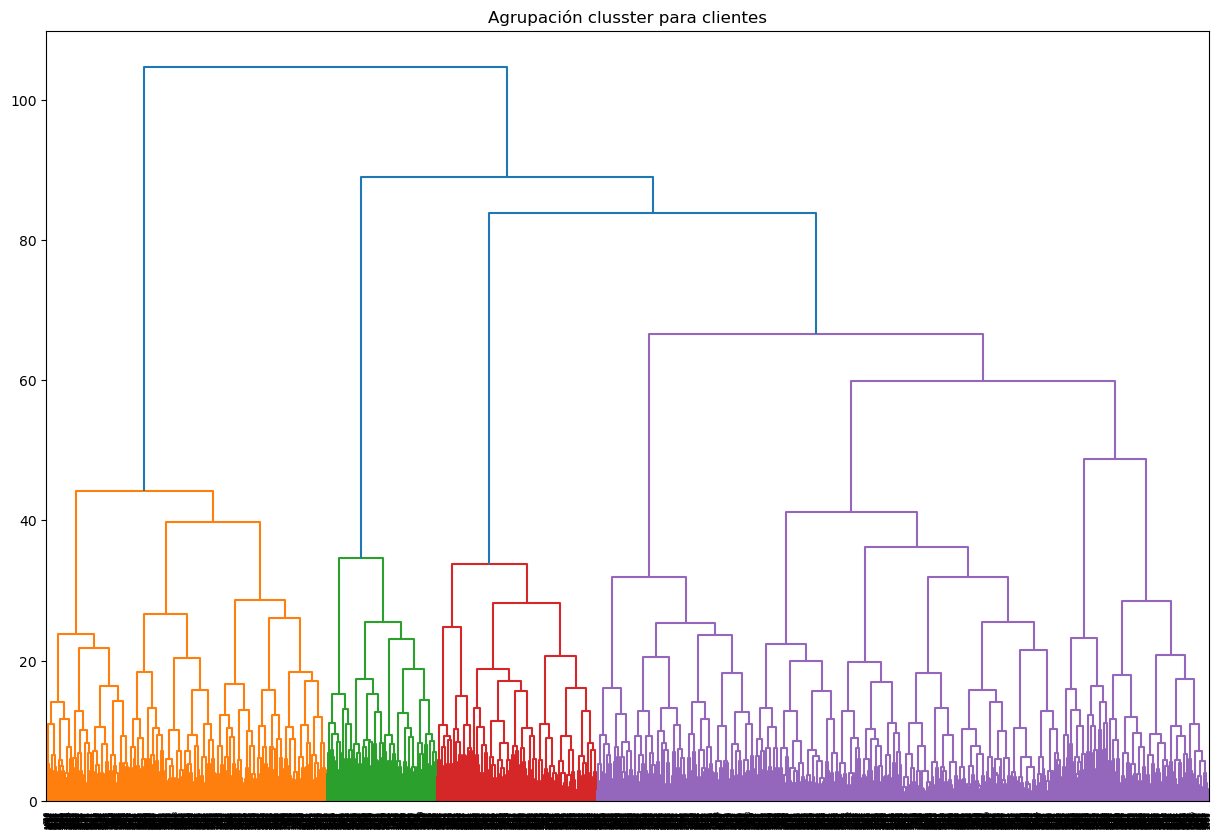

In [12]:
# graficamos los clusters 
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Agrupación clusster para clientes')
plt.show()

## Entrenamiento de metodo K-means

In [13]:
from sklearn.cluster import KMeans

In [14]:
# entrenamos el metodo a 5 clusters
km = KMeans(n_clusters = 5) 
labels = km.fit_predict(X_sc)

In [15]:
# guardamos las etiquetas y calculamos el valor medio para cada una de ellas 
df['cluster_churn']=labels
df_by_clusters=df.groupby(['cluster_churn']).mean()
print(df_by_clusters)

                 gender  Near_Location   Partner  Promo_friends     Phone  \
cluster_churn                                                               
0              0.494505       0.000000  0.465201       0.076923  0.915751   
1              0.492497       1.000000  0.983629       0.581173  0.893588   
2              0.481256       1.000000  0.000000       0.089159  0.905775   
3              0.578608       0.972938  0.337629       0.235825  0.904639   
4              0.507307       0.945720  0.741127       0.516701  0.900835   

               Contract_period  Group_visits        Age  \
cluster_churn                                             
0                     2.225275      0.214286  28.478022   
1                     2.920873      0.369714  28.679400   
2                     1.824721      0.355623  28.288754   
3                     2.987113      0.478093  30.371134   
4                    11.743215      0.562630  29.934238   

               Avg_additional_charges_total  M

In [16]:
# creamos una funcion para graficar los clusters
def histo_clusters(data, caracteristica):
    plt.figure(figsize=(12, 8))
    data_temp = data.copy()
    data_temp['cluster_churn'] = data_temp['cluster_churn'].astype(str)
    sns.histplot(data=data_temp, x=caracteristica, hue='cluster_churn', bins=20, alpha=0.7)
    plt.title(f'Distribución de {caracteristica} por Clúster')
    plt.xlabel(caracteristica)
    plt.ylabel('Frecuencia')
    plt.show()

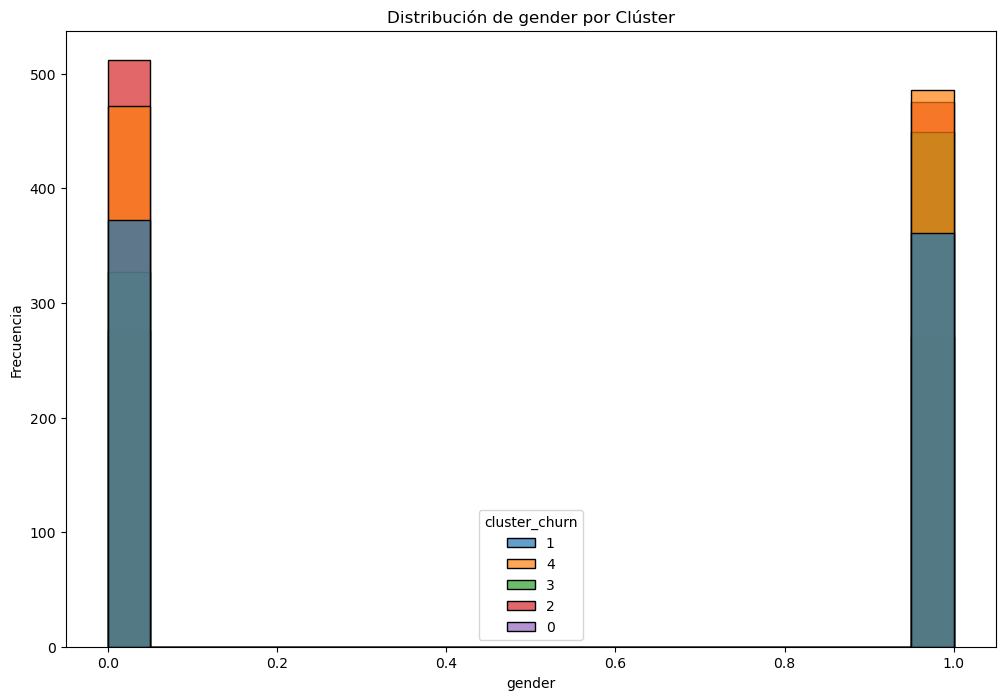

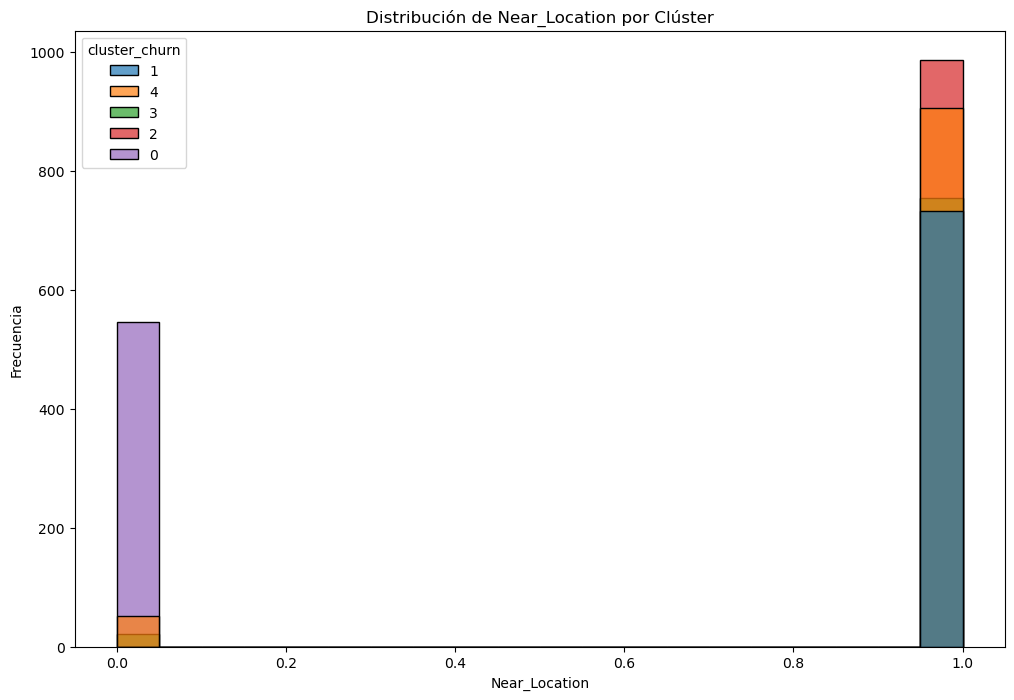

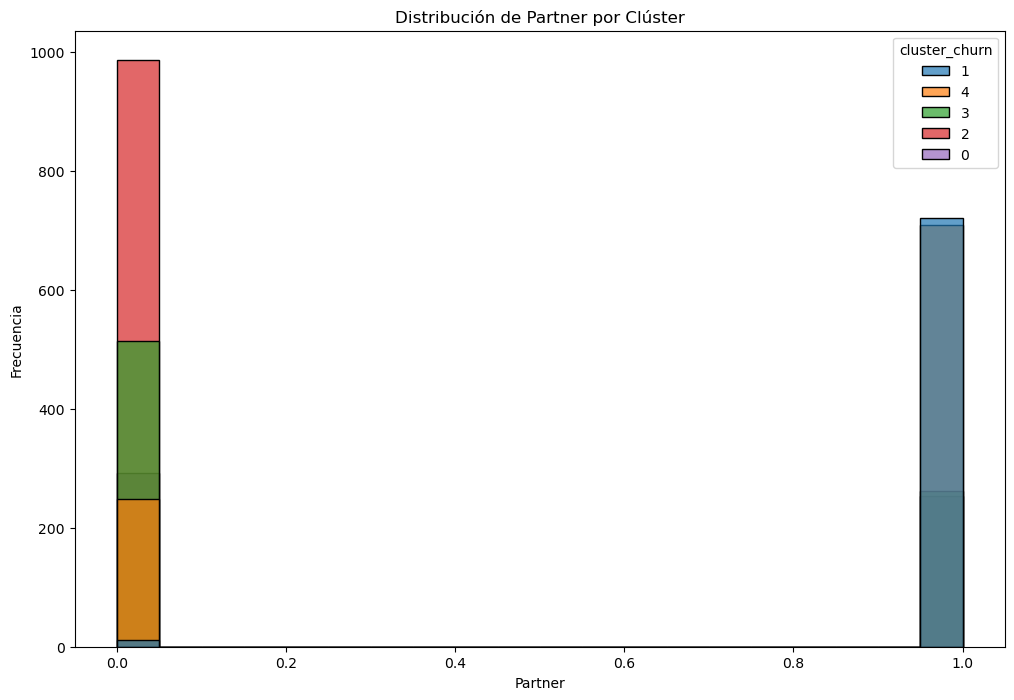

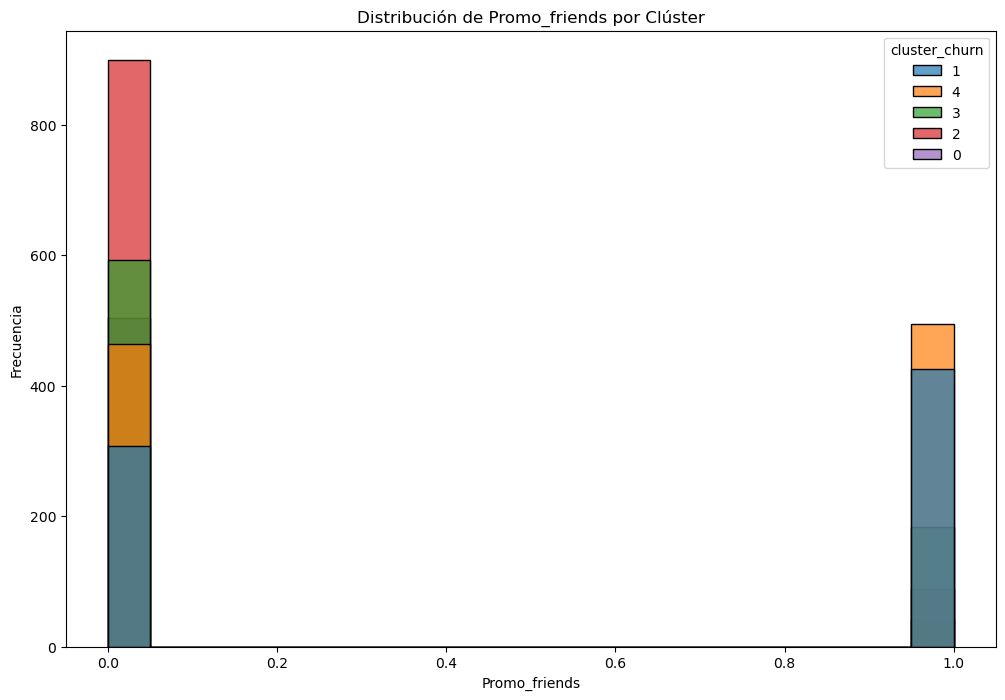

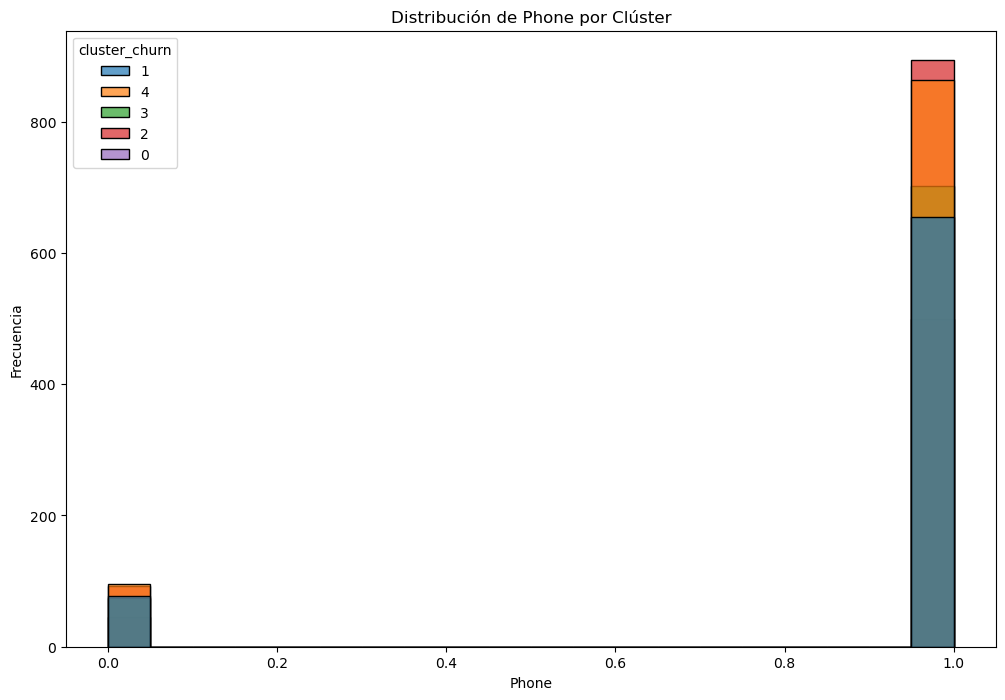

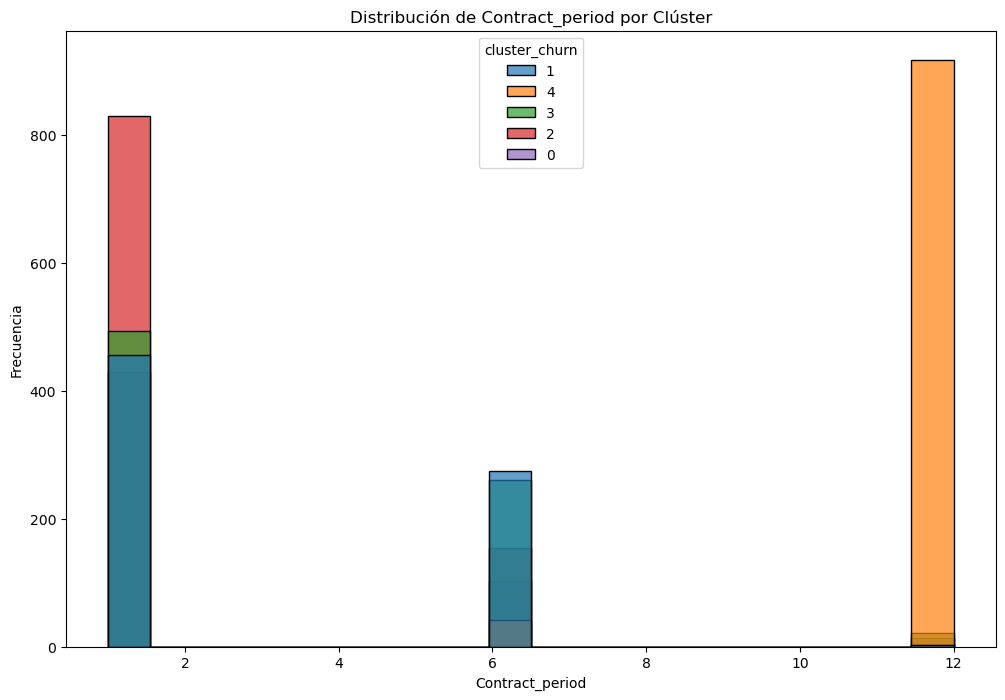

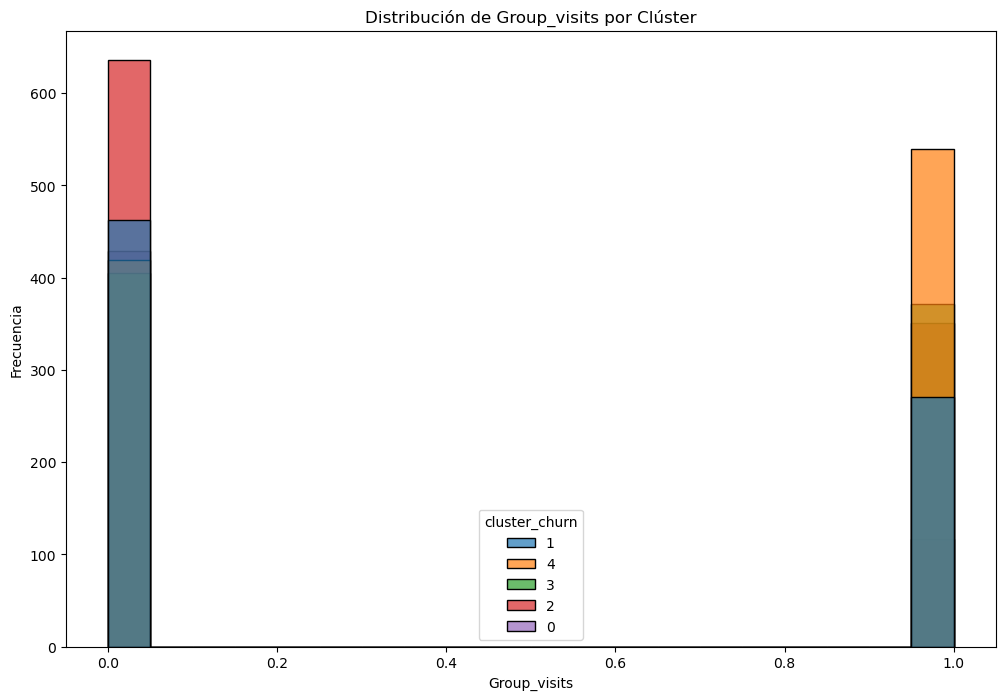

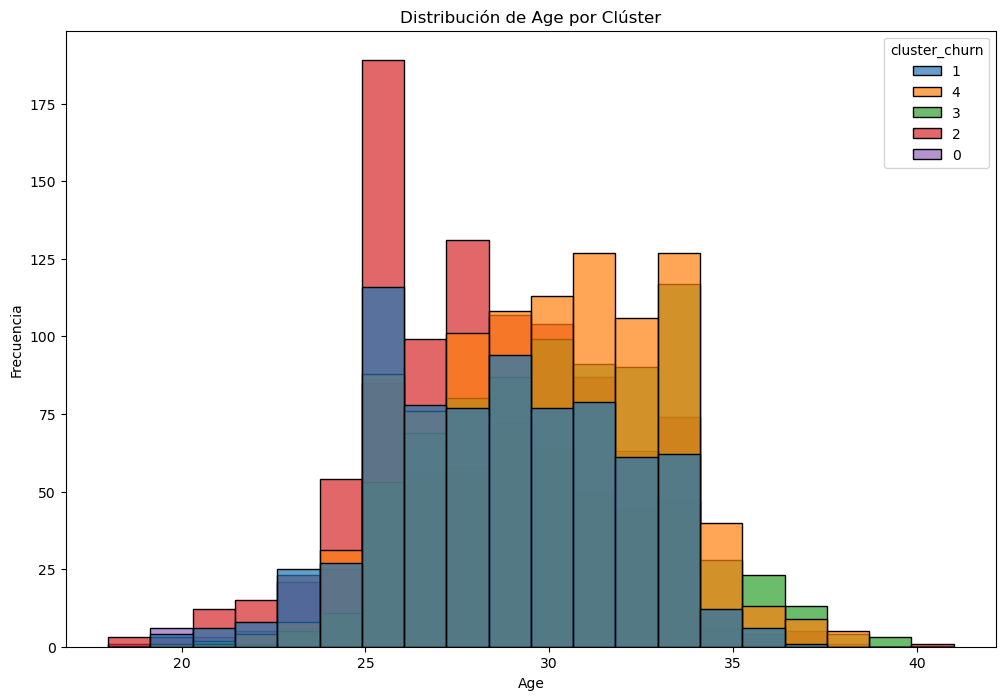

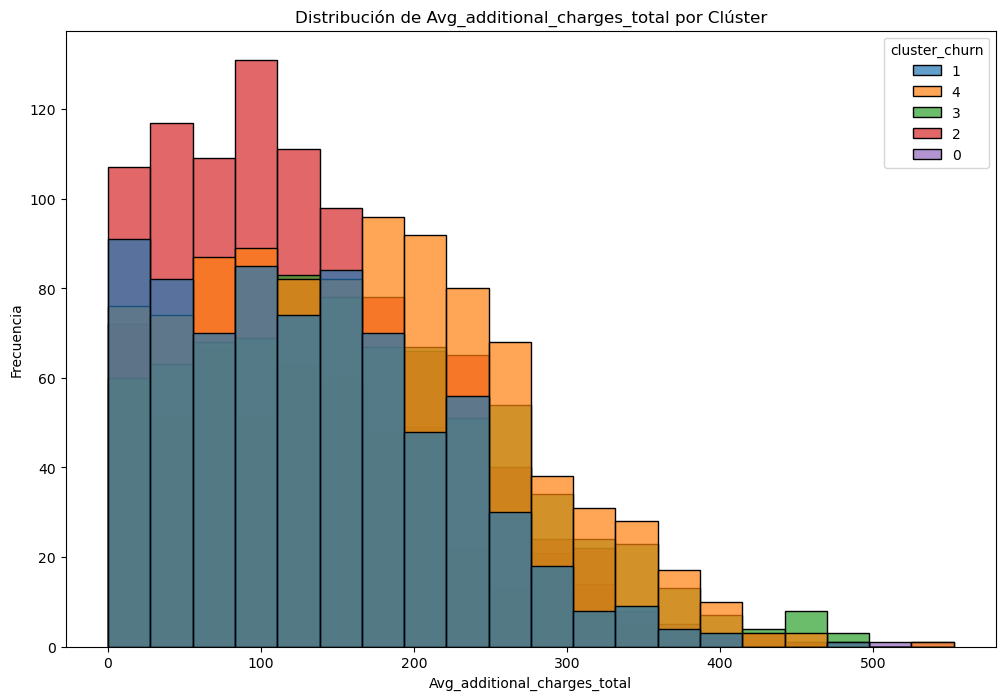

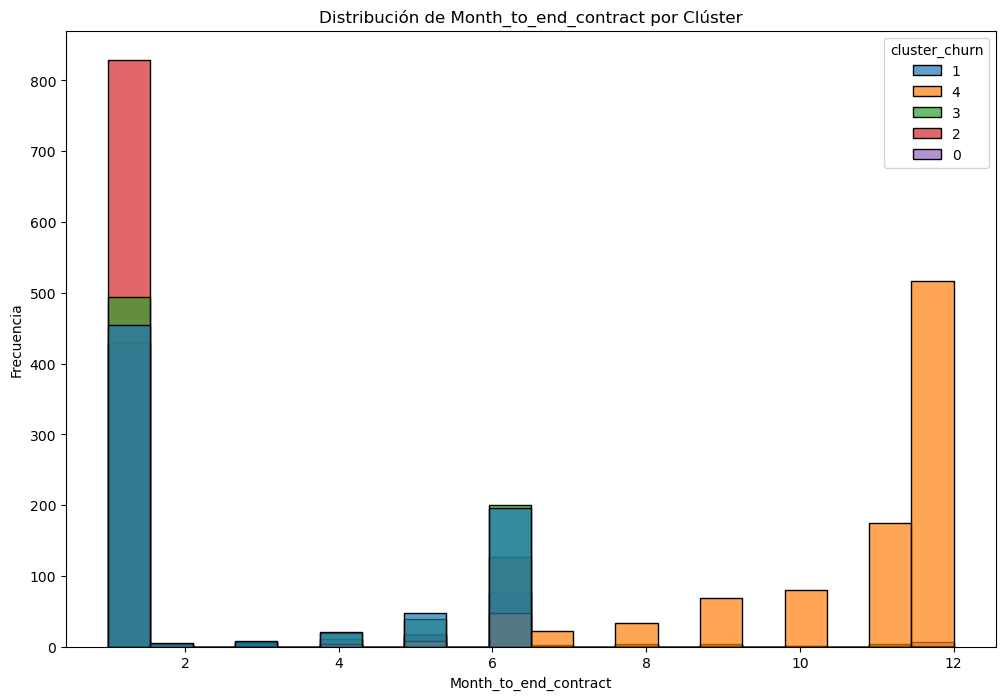

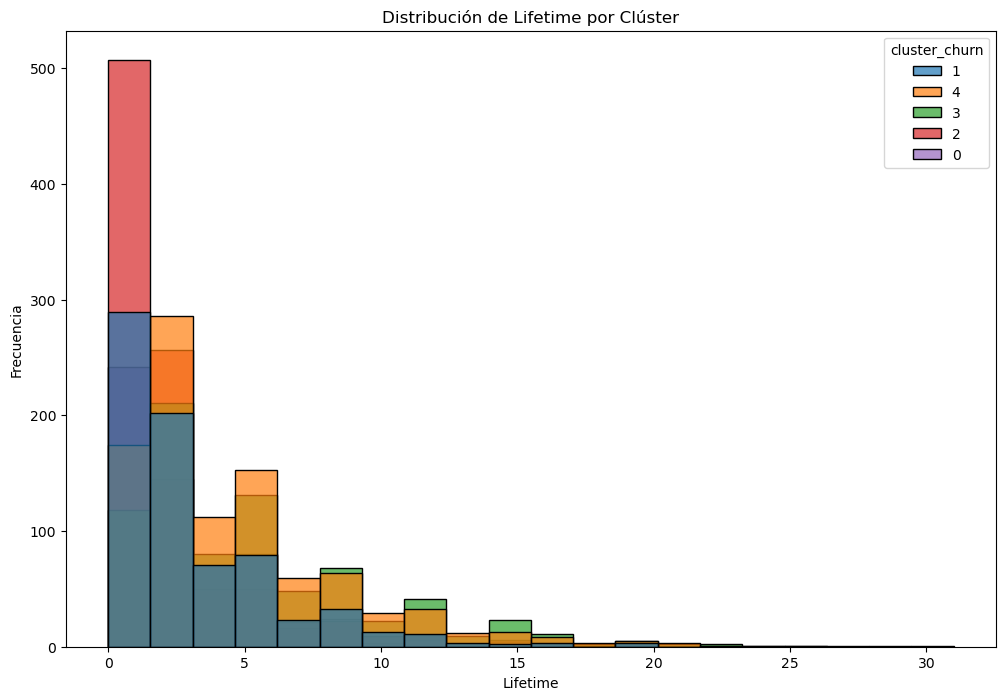

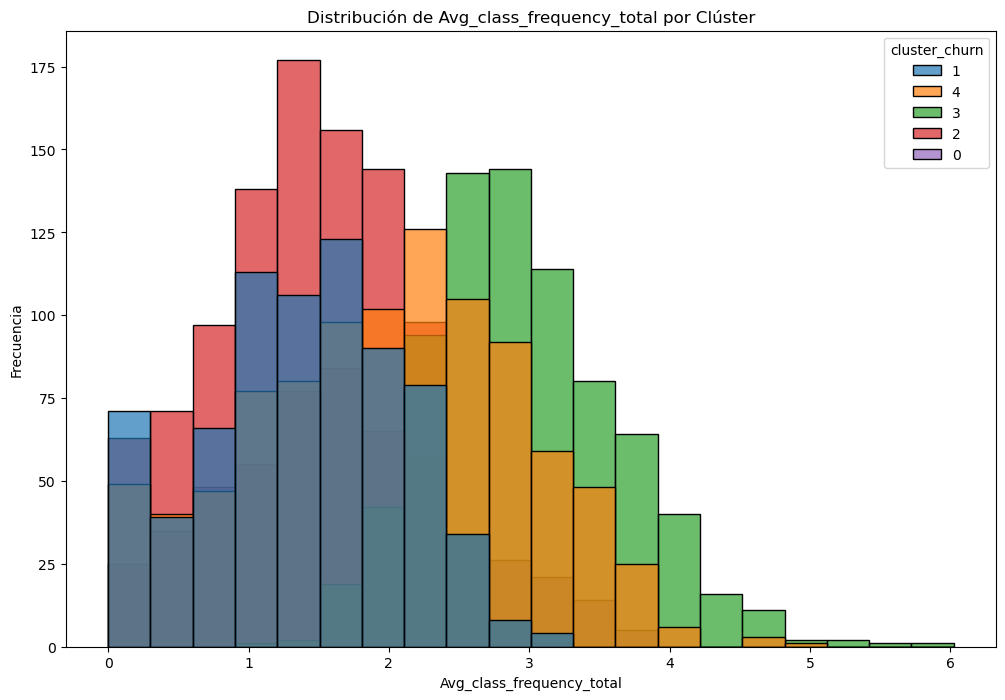

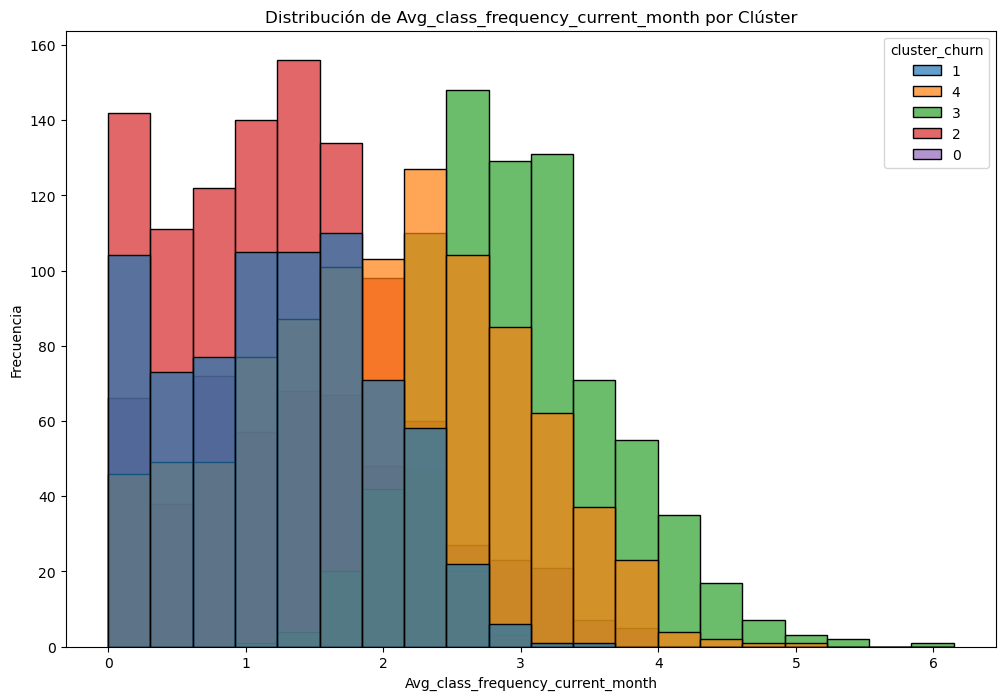

In [17]:
# creamos una lista con las columnas
columnas = df.columns.drop(['Churn', 'cluster_churn'])
# creamos un bucle para graficar cada caracteristica
for columna in columnas:
    histo_clusters(df, columna)

In [18]:
# imprimimos los clusters segun su cancelacion 
print(df_by_clusters['Churn'].sort_values())

cluster_churn
4    0.020877
3    0.029639
1    0.353342
0    0.448718
2    0.520770
Name: Churn, dtype: float64


# Conclucion 
Los clusters con mejor retencion son el 2 y el 3 los cuales cuentan con mas del 90% de retencion, ademas de contar con la clientela que gasta mas dinero en servicios adicionales.
### Observaciones de los clusters con mas retencion:
- Son clientes mayores de 29 años de edad (pueden poseer mas estabilidad economica)
- Cuentan con contratos de 3 a 12 meses( esto puede generar mas compromiso al pagar un plan mas amplio)
-  Suelen vivir cerca de establecimiento

### Medidas 
- Se puede dar promocion a estudiantes (puede ayudar a retener a los juvenes menores de 25, ayudando a su economia)
- Se pueden realizar promociones al firmar contratos por mas de 3 meses (estto puede generar compromiso con las personas al haber pagado con anticipacion)
- Se sugiere sentralizar las campañas publicitarias a zonas cercanas del gym(son los clientes que permaneceran mas tiempo)
- Ofrecer promociones o beneficios a los clientes foraneos o que viven lejos